# Setup

In [ ]:
!pip install git+https://github.com/FacePerceiver/facer.git@main
!pip install timm

  Cloning https://github.com/FacePerceiver/facer.git (to revision main) to /tmp/pip-req-build-yfssg6wy
  Running command git clone --filter=blob:none --quiet https://github.com/FacePerceiver/facer.git /tmp/pip-req-build-yfssg6wy
  Encountered 16 file(s) that should have been pointers, but weren't:
        samples/data/fire.webp
        samples/data/girl.jpg
        samples/data/sideface.jpg
        samples/data/twogirls.jpg
        samples/data/weirdface.jpg
        samples/data/weirdface2.jpg
        samples/data/weirdface3.jpg
        samples/download.ipynb
        samples/example_output/alignment.png
        samples/example_output/detect.png
        samples/example_output/parsing.png
        samples/face_alignment.ipynb
        samples/face_attribute.ipynb
        samples/face_detect.ipynb
        samples/face_parsing.ipynb
        samples/transform.ipynb
  Resolved https://github.com/FacePerceiver/facer.git to commit f0dd2d67def16445454b90a191cc763431795979
  Preparing metadata (se

In [ ]:
!git clone https://github.com/FacePerceiver/facer.git

Cloning into 'facer'...
remote: Enumerating objects: 407, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 407 (delta 13), reused 8 (delta 5), pack-reused 376 (from 1)
Receiving objects: 100% (407/407), 3.01 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Encountered 16 file(s) that should have been pointers, but weren't:
	samples/data/fire.webp
	samples/data/girl.jpg
	samples/data/sideface.jpg
	samples/data/twogirls.jpg
	samples/data/weirdface.jpg
	samples/data/weirdface2.jpg
	samples/data/weirdface3.jpg
	samples/download.ipynb
	samples/example_output/alignment.png
	samples/example_output/detect.png
	samples/example_output/parsing.png
	samples/face_alignment.ipynb
	samples/face_attribute.ipynb
	samples/face_detect.ipynb
	samples/face_parsing.ipynb
	samples/transform.ipynb


In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=335c9bdca88670b1a1a5d44d9290dca5f7a39d54b96b713c5c4a4f0b96b55f5f
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
!pip install tensorflow

In [ ]:
!pip install colormath --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39406 sha256=c31cd864d6d4fc3b41bc6ba91f5f021af7667f0fef6b26c46e2c94f177d5786c
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


In [ ]:
import cv2
import facer
import numpy as np
from skimage import color
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie2000
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
import warnings
import torch
import matplotlib.pyplot as plt
import os
import shutil
import pandas as pd
import math
from ast import literal_eval
from sklearn.metrics import pairwise_distances_argmin_min
from google.colab import files, drive
import time
from skimage import color
from skimage.color import deltaE_ciede2000
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from PIL import Image
import re

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import torchvision.models as models
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from zipfile import ZipFile
from math import ceil
import random
from sklearn.model_selection import train_test_split
# Load ResNet-18 pre-trained on ImageNet
resnet18 = models.resnet18(pretrained=True)

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from joblib import dump
import torch
from torch.utils.data import DataLoader, Dataset


/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


#Google Drive and Zip File Handling

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def copy_dataset_with_subfolders(drive_dataset_path, local_dataset_path):
    os.makedirs(local_dataset_path, exist_ok=True)

    if os.path.exists(drive_dataset_path):
        for root, dirs, files in os.walk(drive_dataset_path):
            relative_path = os.path.relpath(root, drive_dataset_path)
            target_folder = os.path.join(local_dataset_path, relative_path)
            os.makedirs(target_folder, exist_ok=True)

            for file_name in files:
                full_file_name = os.path.join(root, file_name)
                if os.path.isfile(full_file_name):
                    shutil.copy(full_file_name, target_folder)
        print(f"Files and subfolders copied from {drive_dataset_path} to {local_dataset_path}.")
    else:
        print(f"Error: Directory {drive_dataset_path} does not exist.")

copy_dataset_with_subfolders('/content/drive/MyDrive/Parsed_Image', '/content/Parsed_Image/')


Files and subfolders copied from /content/drive/MyDrive/Parsed_Image to /content/Parsed_Image/.


In [ ]:
# Set up device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Monkey-patch numpy to add a warnings attribute
np.warnings = warnings

In [ ]:
new_scale = {
    'Class1': (233, 216, 200), #E9D8C8
    'Class2': (226, 189, 174), #E2BDAE
    'Class3': (211, 185, 152), #D3B998
    'Class4': (198, 158, 118), #C69E76
    'Class5': (193, 132, 99), #C18463
    'Class6': (145, 114, 82), #917252
    'Class7': (109, 74, 55), #6D4A37
    'Class8': (62, 44, 30), #3E2C1E
}

In [ ]:
parsed_dataset_path = '/content/Parsed_Image'

# Execute this section only once to perform the initial parsing.




```
def parse_and_save_faces(dataset_path, output_path):
    # Initialize the face detector and parser
    print("Initializing face detector and parser...")
    face_detector = facer.face_detector('retinaface/mobilenet', device=device)
    face_parser = facer.face_parser('farl/lapa/448', device=device)

    # Dictionary to hold parsed results per class
    parsed_faces_results = {}

    # Process each class folder
    for class_folder in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        # Create output directory for each class
        class_output_dir = os.path.join(output_path, class_folder)
        os.makedirs(class_output_dir, exist_ok=True)

        # Initialize class-specific dictionary
        parsed_faces_results[class_folder] = {}

        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            print(f"Processing image: {image_name} in {class_folder}")
            image_data = facer.read_hwc(image_path)

            if image_data is None:
                print(f"Could not read image {image_path}")
                continue

            # Prepare image tensor
            if torch.is_tensor(image_data):
                if image_data.shape[0] != 3:
                    image_tensor = image_data.permute(2, 0, 1)
                else:
                    image_tensor = image_data
                image_tensor = image_tensor.unsqueeze(0).to(device)
            elif isinstance(image_data, np.ndarray):
                image_tensor = torch.from_numpy(image_data.astype('float32')).permute(2, 0, 1).unsqueeze(0).to(device)

            with torch.inference_mode():
                try:
                    faces = face_detector(image_tensor)
                    if faces:
                        parsed_faces = face_parser(image_tensor, faces)
                        if 'seg' in parsed_faces:
                            seg_probs = torch.sigmoid(parsed_faces['seg']['logits'])
                            binary_mask = seg_probs[0, 1, :, :] > 0.5
                            binary_mask_3d = np.repeat(binary_mask.cpu().numpy()[:, :, np.newaxis], 3, axis=2)
                            skin_region = image_data.cpu().numpy() * binary_mask_3d
                            skin_region_uint8 = skin_region.astype(np.uint8)

                            parsed_image_path = os.path.join(class_output_dir, os.path.basename(image_path))
                            Image.fromarray(skin_region_uint8).save(parsed_image_path)
                            print(f"Skin region parsed and saved to {parsed_image_path}")

                            # Save path of parsed image in results dictionary
                            parsed_faces_results[class_folder][image_name] = parsed_image_path
                except RuntimeError as e:
                    print(f"Error processing {image_path}: {str(e)}")

    # Save parsed face results
    torch.save(parsed_faces_results, os.path.join(output_path, 'parsed_faces_results.pth'))
    print(f"Parsed faces saved to {output_path}")
```





```
# Input path
input_path = "/content/new_skin_tone_dataset"

# Output path in Google Drive
output_path = "/content/drive/MyDrive/Parsing"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Parse faces and save results
parse_and_save_faces(input_path, output_path)
```



# Preprocssing functions

In [ ]:
def blur_image(image, blur_amount):
"""
    Apply a Gaussian blur to an image with a blur amount proportional to the image's width.

    Steps:
    1. Calculate the kernel size for the Gaussian blur based on the blur amount and image width.
       - The kernel size is computed as an integer proportion of the image width.
       - Ensure the kernel size is odd, as required by the GaussianBlur function.
    2. Apply the Gaussian blur using the computed kernel size to create a smooth blurring effect.
    3. Return the blurred image.

    Parameters:
    - image (numpy.ndarray): Input image to be blurred, typically in BGR format.
    - blur_amount (float): Factor determining the intensity of the blur. Higher values result in more blur.

    Returns:
    - blurred_image (numpy.ndarray): The blurred image with the same dimensions as the input.
    """
    # Calculate the kernel size based on the new blur amount
    kernel_size = int(blur_amount * image.shape[1])  # Proportional to image width
    if kernel_size % 2 == 0:  # Kernel size must be odd
        kernel_size += 1
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred_image

In [ ]:
def apply_gamma_correction(image, gamma):
  """
    Adjust the brightness of an image using gamma correction.

    Gamma correction adjusts pixel intensity values to improve image appearance by either brightening
    or darkening the image, depending on the gamma value. This function maps the original pixel
    values to new ones using a lookup table (LUT) for efficiency.

    Steps:
    1. Compute the inverse of the gamma value (`inv_gamma = 1.0 / gamma`).
    2. Generate a lookup table for all possible pixel values (0-255).
       - Each value is transformed using the formula: (value / 255.0) ** inv_gamma * 255.
       - This maps input pixel intensities to corrected output intensities.
    3. Use OpenCV's `cv2.LUT` function to apply the lookup table to the image efficiently.
    4. Return the gamma-corrected image.

    Parameters:
    - image (numpy.ndarray): Input image for gamma correction, typically in BGR or grayscale format.
    - gamma (float): Gamma value for correction.
        - gamma > 1: Darkens the image.
        - gamma < 1: Brightens the image.

    Returns:
    - corrected_image (numpy.ndarray): Image with gamma correction applied.
    """
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [ ]:
def apply_adaptive_color_correction(image_bgr):
  """
    Perform adaptive color correction on an image by adjusting the red channel intensity.

    This function adjusts the red channel's intensity adaptively based on the average intensities
    of the green and red channels. The adjustment aims to balance the red color relative to
    the green channel to produce a more visually pleasing result.

    Steps:
    1. Convert the image to `float32` to avoid overflow during calculations.
    2. Calculate the average intensity for each color channel (blue, green, red).
    3. Compute an adaptive boost for the red channel based on the green-to-red intensity ratio:
       - If the red channel is less intense relative to green, it gets a proportional boost.
    4. Apply the computed boost to the red channel.
    5. Clip the pixel values to ensure they remain within the valid range [0, 255].
    6. Convert the image back to the RGB format for display.

    Parameters:
    - image_bgr (numpy.ndarray): Input image in BGR format.

    Returns:
    - corrected_image (numpy.ndarray): Color-corrected image in RGB format.
    """
    # Convert to float for safe multiplication
    image_bgr = image_bgr.astype(np.float32)

    # Calculate the average intensity of each channel
    avg_blue = np.mean(image_bgr[:, :, 0])
    avg_green = np.mean(image_bgr[:, :, 1])
    avg_red = np.mean(image_bgr[:, :, 2])

    # Apply a proportional boost to red channel based on its initial intensity
    red_boost = 1.0 + (0.2 * (avg_green - avg_red) / avg_green)  # Adaptive based on green-red ratio

    # Apply slight correction
    image_bgr[:, :, 2] *= red_boost  # Apply only to the red channel

    # Clip values to avoid overflow
    image_bgr = np.clip(image_bgr, 0, 255).astype(np.uint8)

    # Convert back to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    return image_rgb


# Evaluation metrics function

In [ ]:
def calculate_metrics(true_labels, predicted_labels):
    print("Calculating evaluation metrics...")
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

#Skin Tone Classification with K-Means - Euclidean distance - RGB

In [ ]:
def find_closest_skinTone_class_with_Euclidean(dominant_rgb, scale_colors):
    """
    Find the closest skin tone class based on Euclidean distance to the RGB values.

    Parameters:
    dominant_rgb (array-like): The RGB color of the dominant skin tone.
    scale_colors (dict): A dictionary where keys are class names and values are RGB tuples.

    Returns:
    str: The name of the closest class.
    """
    min_distance = float('inf')
    closest_class = None

    for class_name, rgb_value in scale_colors.items():
        # Calculate Euclidean distance
        distance = np.linalg.norm(np.array(dominant_rgb) - np.array(rgb_value))

        # Update the closest class if the current distance is smaller
        if distance < min_distance:
            min_distance = distance
            closest_class = class_name

    return closest_class


In [ ]:

def find_dominant_color_xmeans(rgb_values, initial_clusters=2):
"""
    Determine the dominant color in an image using X-Means clustering.

    This function applies the X-Means clustering algorithm to a set of RGB values
    from an image to identify clusters of colors. The algorithm dynamically determines
    the optimal number of clusters and identifies the most common color in the image
    (the dominant color).

    Steps:
    1. Use the K-Means++ initializer to select better starting points for clustering.
    2. Define the clustering metric as the Euclidean distance.
    3. Initialize and configure the X-Means clustering algorithm.
    4. Perform clustering on the provided RGB data.
    5. Retrieve the resulting clusters and their centers (mean RGB values).
    6. Identify the cluster with the most data points (largest cluster).
    7. Return the RGB values of the dominant color.

    Parameters:
    - rgb_values (numpy.ndarray): A 2D array of shape (n, 3), where each row represents
      an RGB color in the image.
    - initial_clusters (int): Initial number of clusters for the X-Means algorithm.

    Returns:
    - dominant_color (numpy.ndarray): The RGB values of the dominant color,
      represented as an integer array.

    Notes:
    - X-Means is an extension of K-Means that determines the optimal number of clusters.
    - This method uses the `pyclustering` library for X-Means clustering.
    """
    # Initial centers using KMeans++ for better starting points
    initial_centers = kmeans_plusplus_initializer(rgb_values, initial_clusters).initialize()

    # Create a metric for X-Means (Euclidean distance)
    metric = distance_metric(type_metric.EUCLIDEAN)

    # Initialize X-Means with initial centers and the desired metric
    xmeans_instance = xmeans(rgb_values, initial_centers, ccore=True, metric=metric)

    # Perform the clustering
    xmeans_instance.process()

    # Get clusters and centers
    clusters = xmeans_instance.get_clusters()
    centers = xmeans_instance.get_centers()

    # Find the largest cluster (most common color)
    largest_cluster_index = np.argmax([len(cluster) for cluster in clusters])
    dominant_color = np.array(centers[largest_cluster_index])

    return dominant_color.astype(int)

In [ ]:
def apply_color_correction(image_bgr):
  """
    Apply color correction to an image to enhance its appearance by balancing the color channels.

    Steps:
    1. Convert the image to float32 to allow for precise arithmetic operations and avoid overflow.
    2. Apply scaling factors to each color channel (blue, green, red) to boost or reduce their intensities.
       - These scaling factors can be adjusted based on the desired enhancement.
    3. Clip the resulting values to ensure they remain within the valid range [0, 255] for pixel intensity.
    4. Convert the image from BGR (used by OpenCV) to RGB (standard for display and further processing).

    Parameters:
    - image_bgr (numpy.ndarray): Input image in BGR format with pixel intensities in the range [0, 255].

    Returns:
    - image_rgb (numpy.ndarray): Color-corrected image in RGB format, ready for display or further processing.
    """
    # Convert image to float32 to avoid overflow
    image_bgr = image_bgr.astype('float32')

    # Adjust channel weights to balance colors (experiment with these values)
    blue_boost = 0.9
    red_boost = 1.2
    green_boost = 1.0

    # Apply the corrections to each channel
    image_bgr[:, :, 0] *= blue_boost  # Blue
    image_bgr[:, :, 1] *= green_boost  # Green
    image_bgr[:, :, 2] *= red_boost  # Red

    # Clip values to remain within valid range
    image_bgr = np.clip(image_bgr, 0, 255).astype('uint8')

    # Convert BGR to RGB for display
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Return corrected image for further use
    return image_rgb

In [ ]:
def extract_numeric_class(label):
    """Extract the numeric part of a class label (e.g., Class3 -> 3, Subclass2 -> 2)."""
    match = re.search(r'\d+', label)  # Look for numbers in the label
    return match.group() if match else None  # Return the number if found

In [ ]:
def visualize_and_evaluate_images_euclidean_rgb(parsed_dataset_path, batch_size):
  """
    Visualize parsed images, evaluate their dominant colors using the Euclidean distance,
    and compare predictions against ground truth labels.

    This function iterates through a dataset of parsed images, processes each image to
    determine its dominant color, predicts the closest skin tone class, and evaluates
    the prediction accuracy based on ground truth labels.

    Parameters:
    - parsed_dataset_path (str): Path to the directory containing parsed images grouped by class.
    - batch_size (int): Maximum number of images to process in a single evaluation.

    Workflow:
    1. Iterate through class folders in the parsed dataset directory.
    2. Load and validate parsed images.
    3. Extract the dominant color of the image using X-Means clustering.
    4. Predict the closest skin tone class using Euclidean distance.
    5. Compare predictions with ground truth labels and store results.
    6. Compute and display evaluation metrics.

    Returns:
    - None: Outputs evaluation metrics and any relevant information directly.

    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Process the parsed image to find dominant color
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask)
                rgb_codes = parsed_image[indices[:, 0], indices[:, 1], :]

                # Find dominant color using the X-Means method
                dominant_color = find_dominant_color_xmeans(rgb_codes)

                # Find closest skin tone class based on the dominant color
                class_name = find_closest_skinTone_class_with_Euclidean(dominant_color, new_scale)

                # Extract ground truth class from image name
                ground_truth = image_name.split('_')[-1].split('.')[0]

                # Store ground truth and prediction
                ground_truth_labels.append(ground_truth)
                predicted_labels.append(class_name)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics if valid images were processed
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid parsed images processed for evaluation.")

In [ ]:
#400
visualize_and_evaluate_images_euclidean_rgb('/content/drive/MyDrive/Parsed_Image', batch_size=400)

Loading parsed image: 8_Class3.png
Loading parsed image: 45_Class3.png
Loading parsed image: 50_Class3.png
Loading parsed image: 2_Class3.png
Loading parsed image: 46_Class3.png
Loading parsed image: 33_Class3.png
Loading parsed image: 21_Class3.png
Loading parsed image: 10_Class3.png
Loading parsed image: 38_Class3.png
Loading parsed image: 9_Class3.png
Loading parsed image: 30_Class3.png
Loading parsed image: 13_Class3.png
Loading parsed image: 23_Class3.png
Loading parsed image: 39_Class3.png
Loading parsed image: 22_Class3.png
Loading parsed image: 25_Class3.png
Loading parsed image: 48_Class3.png
Loading parsed image: 31_Class3.png
Loading parsed image: 49_Class3.png
Loading parsed image: 7_Class3.png
Loading parsed image: 28_Class3.png
Loading parsed image: 36_Class3.png
Loading parsed image: 43_Class3.png
Loading parsed image: 40_Class3.png
Loading parsed image: 20_Class3.png
Loading parsed image: 47_Class3.png
Loading parsed image: 26_Class3.png
Loading parsed image: 17_Class3.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#720
visualize_and_evaluate_images_euclidean_rgb('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Loading parsed image: 9_Class1.png
Loading parsed image: 4_Class1.png
Loading parsed image: 7_Class1.png
Loading parsed image: 2_Class1.png
Loading parsed image: 1_Class1.png
Loading parsed image: 3_Class1.png
Loading parsed image: 10_Class1.png
Loading parsed image: 5_Class1.png
Loading parsed image: 8_Class1.png
Loading parsed image: 13_Class1.png
Loading parsed image: 16_Class1.png
Loading parsed image: 11_Class1.png
Loading parsed image: 20_Class1.png
Loading parsed image: 18_Class1.png
Loading parsed image: 15_Class1.png
Loading parsed image: 14_Class1.png
Loading parsed image: 12_Class1.png
Loading parsed image: 19_Class1.png
Loading parsed image: 17_Class1.png
Loading parsed image: 21_Class1.png
Loading parsed image: 25_Class1.png
Loading parsed image: 22_Class1.png
Loading parsed image: 30_Class1.png
Loading parsed image: 24_Class1.png
Loading parsed image: 28_Class1.png
Loading parsed image: 26_Class1.png
Loading parsed image: 27_Class1.png
L

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Testing the Blurring Effect on the Result


In [ ]:
def visualize_and_evaluate_images_euclidean_rgb_with_blur(parsed_dataset_path, batch_size, blur_amount=0.08, gamma_value=1.0):
  """
    Visualize and evaluate images using Euclidean RGB distance for classification with preprocessing steps like blur and gamma correction.

    Parameters:
    - parsed_dataset_path: Path to the dataset containing parsed images.
    - batch_size: Number of images to process in a single batch.
    - blur_amount: Amount of Gaussian blur to apply (default: 0.08).
    - gamma_value: Gamma correction value to enhance the image (default: 1.0).

    Workflow:
    1. Iterates through class folders in the parsed dataset path.
    2. Loads and preprocesses each image by applying:
        - Adaptive color correction.
        - Gaussian blur.
        - Gamma correction.
    3. Extracts skin pixels using a binary mask.
    4. Determines the dominant color using X-means clustering.
    5. Finds the closest skin tone class based on the Euclidean distance in RGB space.
    6. Evaluates and calculates metrics using the ground truth and predicted labels.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image directly
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Apply blur and gamma correction to the parsed image
            print(f"Applying blur and gamma correction to image: {image_name}")
            image_rgb = apply_adaptive_color_correction(parsed_image)
            blurred_image = blur_image(image_rgb, blur_amount=blur_amount)
            gamma_corrected_image = apply_gamma_correction(blurred_image, gamma=gamma_value)

            # Extract non-zero (skin) pixels from the parsed image
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask)
                rgb_codes = gamma_corrected_image[indices[:, 0], indices[:, 1], :]

                # Find dominant color using the X-Means method
                dominant_color = find_dominant_color_xmeans(rgb_codes)

                # Find closest skin tone class based on the dominant color
                class_name = find_closest_skinTone_class_with_Euclidean(dominant_color, new_scale)

                # Extract ground truth class from image name
                ground_truth = image_name.split('_')[-1].split('.')[0]

                # Store ground truth and prediction
                ground_truth_labels.append(ground_truth)
                predicted_labels.append(class_name)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics if valid images were processed
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid parsed images processed for evaluation.")

In [ ]:
#400
visualize_and_evaluate_images_euclidean_rgb_with_blur(parsed_dataset_path, batch_size=400)

Loading parsed image: 40_Class5.png
Applying blur and gamma correction to image: 40_Class5.png
Loading parsed image: 18_Class5.png
Applying blur and gamma correction to image: 18_Class5.png
Loading parsed image: 45_Class5.png
Applying blur and gamma correction to image: 45_Class5.png
Loading parsed image: 8_Class5.png
Applying blur and gamma correction to image: 8_Class5.png
Loading parsed image: 16_Class5.png
Applying blur and gamma correction to image: 16_Class5.png
Loading parsed image: 35_Class5.png
Applying blur and gamma correction to image: 35_Class5.png
Loading parsed image: 41_Class5.png
Applying blur and gamma correction to image: 41_Class5.png
Loading parsed image: 11_Class5.png
Applying blur and gamma correction to image: 11_Class5.png
Loading parsed image: 21_Class5.png
Applying blur and gamma correction to image: 21_Class5.png
Loading parsed image: 47_Class5.png
Applying blur and gamma correction to image: 47_Class5.png
Loading parsed image: 12_Class5.png
Applying blur an

In [ ]:
#720
visualize_and_evaluate_images_euclidean_rgb_with_blur('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Applying blur and gamma correction to image: 6_Class1.png
Loading parsed image: 9_Class1.png
Applying blur and gamma correction to image: 9_Class1.png
Loading parsed image: 4_Class1.png
Applying blur and gamma correction to image: 4_Class1.png
Loading parsed image: 7_Class1.png
Applying blur and gamma correction to image: 7_Class1.png
Loading parsed image: 2_Class1.png
Applying blur and gamma correction to image: 2_Class1.png
Loading parsed image: 1_Class1.png
Applying blur and gamma correction to image: 1_Class1.png
Loading parsed image: 3_Class1.png
Applying blur and gamma correction to image: 3_Class1.png
Loading parsed image: 10_Class1.png
Applying blur and gamma correction to image: 10_Class1.png
Loading parsed image: 5_Class1.png
Applying blur and gamma correction to image: 5_Class1.png
Loading parsed image: 8_Class1.png
Applying blur and gamma correction to image: 8_Class1.png
Loading parsed image: 13_Class1.png
Applying blur and gamma correcti

#Skin Tone Classification with K-Means - Delta E (CIE 2000) distance - HSV

In [ ]:
# Function to convert RGB to HSV
def rgb_to_hsv(rgb_color):
    rgb_color = np.array([[rgb_color]], dtype=np.uint8)
    hsv_color = cv2.cvtColor(rgb_color, cv2.COLOR_RGB2HSV)
    return hsv_color[0][0]

# Convert HSV color to LAB using RGB as an intermediary
def hsv_to_lab(hsv_color):
    hsv_color = np.array([[hsv_color]], dtype=np.uint8)
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    lab_color = color.rgb2lab(rgb_color / 255.0)
    return lab_color[0][0]

In [ ]:
# Find closest class using Delta E (CIE 2000) on converted HSV to LAB
def find_closest_class_delta_e_hsv(dominant_hsv, scale_colors):
  """
    Determine the closest color class to a given dominant HSV color by comparing
    Delta E (CIE 2000) in the LAB color space.

    This function:
    1. Converts the dominant HSV color to LAB format.
    2. Iterates through a set of predefined color classes, converts their RGB values to LAB,
       and computes Delta E (CIE 2000) to find the closest match.
    3. Returns the name of the closest class.

    Parameters:
    - dominant_hsv (array-like): The HSV values of the dominant color [H, S, V].
    - scale_colors (dict): A dictionary mapping class names to their representative RGB values.

    Returns:
    - closest_class (str): The name of the closest matching color class.
    """
    dominant_lab = hsv_to_lab(dominant_hsv)

    min_delta_e = float('inf')
    closest_class = None

    for class_name, rgb_value in scale_colors.items():
        # Convert RGB value to HSV and then to LAB
        class_hsv = rgb_to_hsv(rgb_value)
        class_lab = hsv_to_lab(class_hsv)

        # Convert LAB arrays to 3D for scikit-image deltaE
        # dominant_lab and class_lab should be shaped like [[L, a, b]]
        dominant_lab = np.array(dominant_lab).reshape(1, 3)
        class_lab = np.array(class_lab).reshape(1, 3)

        # Calculate Delta E (CIE 2000) using scikit-image
        delta_e = color.deltaE_ciede2000(dominant_lab, class_lab)

        # deltaE_ciede2000 returns an array, so get the scalar value
        delta_e = delta_e.item()

        # Find the class with the minimum Delta E
        if delta_e < min_delta_e:
            min_delta_e = delta_e
            closest_class = class_name

    return closest_class

In [ ]:
# Function to find the dominant color using X-means clustering in HSV
def find_dominant_color_xmeans_hsv(hsv_values, initial_clusters=3):
  """
    Identify the dominant color from a set of HSV values using X-means clustering.

    This function:
    1. Initializes clusters using K-means++ for better starting points.
    2. Applies X-means clustering to automatically determine the optimal number of clusters.
    3. Identifies the cluster with the largest number of points (most common color).
    4. Returns the HSV value of the dominant color.

    Parameters:
    - hsv_values (array-like): A 2D array of HSV values, where each row represents a single color [H, S, V].
    - initial_clusters (int): The number of initial clusters to start with for X-means (default is 3).

    Returns:
    - dominant_color (ndarray): The HSV values of the dominant color as an integer array.
    """
    initial_centers = kmeans_plusplus_initializer(hsv_values, initial_clusters).initialize()

    metric = distance_metric(type_metric.EUCLIDEAN)
    xmeans_instance = xmeans(hsv_values, initial_centers, ccore=True, metric=metric)
    xmeans_instance.process()

    clusters = xmeans_instance.get_clusters()
    centers = xmeans_instance.get_centers()

    largest_cluster_index = np.argmax([len(cluster) for cluster in clusters])
    dominant_color = np.array(centers[largest_cluster_index])

    return dominant_color.astype(int)

In [ ]:
def visualize_and_evaluate_images_delta_e_hsv(parsed_dataset_path, batch_size):
  """
    Visualize and evaluate parsed images using Delta E (CIE 2000) for HSV-based classification.

    This function:
    1. Loads parsed images from a dataset directory.
    2. Extracts skin pixels (non-zero values) from each image.
    3. Converts extracted RGB skin pixels to HSV.
    4. Determines the dominant HSV color using X-means clustering.
    5. Finds the closest skin tone class using Delta E (CIE 2000) based on HSV to LAB conversion.
    6. Evaluates predictions against ground truth labels.

    Parameters:
    - parsed_dataset_path (str): Path to the dataset containing parsed images.
    - batch_size (int): Maximum number of images to process.

    Returns:
    - None: Prints metrics and evaluation results.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image directly
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Extract non-zero (skin) pixels from the parsed image
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask == 1)

                # Extract RGB skin pixels using mask indices
                rgb_skin_pixels = parsed_image[indices[:, 0], indices[:, 1], :]

                # Convert the extracted RGB pixels to HSV
                hsv_codes = cv2.cvtColor(np.array([rgb_skin_pixels]), cv2.COLOR_RGB2HSV)[0]

                # Find dominant HSV color using X-means method
                print(f"Finding dominant color in image: {image_name}")
                dominant_hsv = find_dominant_color_xmeans_hsv(hsv_codes)

                # Find closest class using Delta E (CIE 2000) based on HSV to LAB conversion
                class_name = find_closest_class_delta_e_hsv(dominant_hsv, new_scale)

                # Extract ground truth class from image name
                ground_truth = image_name.split('_')[-1].split('.')[0]

                # Store ground truth and prediction
                ground_truth_labels.append(ground_truth)
                predicted_labels.append(class_name)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics after processing all images
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid images processed for evaluation.")

In [ ]:
visualize_and_evaluate_images_delta_e_hsv('/content/drive/MyDrive/Parsed_Image', batch_size=400)

Loading parsed image: 8_Class3.png
Finding dominant color in image: 8_Class3.png
Loading parsed image: 45_Class3.png
Finding dominant color in image: 45_Class3.png
Loading parsed image: 50_Class3.png
Finding dominant color in image: 50_Class3.png
Loading parsed image: 2_Class3.png
Finding dominant color in image: 2_Class3.png
Loading parsed image: 46_Class3.png
Finding dominant color in image: 46_Class3.png
Loading parsed image: 33_Class3.png


In [ ]:
visualize_and_evaluate_images_delta_e_hsv('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Finding dominant color in image: 6_Class1.png
Loading parsed image: 9_Class1.png
Finding dominant color in image: 9_Class1.png
Loading parsed image: 4_Class1.png
Finding dominant color in image: 4_Class1.png
Loading parsed image: 7_Class1.png
Finding dominant color in image: 7_Class1.png
Loading parsed image: 2_Class1.png
Finding dominant color in image: 2_Class1.png
Loading parsed image: 1_Class1.png
Finding dominant color in image: 1_Class1.png
Loading parsed image: 3_Class1.png
Finding dominant color in image: 3_Class1.png
Loading parsed image: 10_Class1.png
Finding dominant color in image: 10_Class1.png
Loading parsed image: 5_Class1.png
Finding dominant color in image: 5_Class1.png
Loading parsed image: 8_Class1.png
Finding dominant color in image: 8_Class1.png
Loading parsed image: 13_Class1.png
Finding dominant color in image: 13_Class1.png
Loading parsed image: 16_Class1.png
Finding dominant color in image: 16_Class1.png
Loading parsed image: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Testing the Blurring Effect on the Result


In [ ]:
def rgb_to_hsv_3(rgb_color):
  """
    Convert RGB color(s) to HSV color space.

    This function:
    1. Ensures the input is compatible with OpenCV's `cv2.cvtColor` function.
    2. Converts one or more RGB colors to HSV.
    3. Returns the converted HSV values.

    Parameters:
    - rgb_color (numpy.ndarray): A single RGB color or an array of RGB colors.
      - Shape can be (3,) for a single RGB value or (N, 3) for multiple RGB values.

    Returns:
    - numpy.ndarray: HSV representation of the input RGB color(s).
      - Shape will be the same as the input, but values will be in HSV space.
    """
    if len(rgb_color.shape) == 1:
        rgb_color = np.expand_dims(rgb_color, axis=0)

    # Reshape to (H, W, 3) where H is 1 (for single row), and W is the number of pixels
    rgb_color = rgb_color.reshape(1, -1, 3).astype(np.uint8)  # Treat as a single row of pixels

    # Convert RGB to HSV
    hsv_color = cv2.cvtColor(rgb_color, cv2.COLOR_RGB2HSV)

    # Return HSV values
    return hsv_color[0]

In [ ]:
def visualize_and_evaluate_images_with_blur_delta_e_hsv(parsed_dataset_path, batch_size, blur_amount=0.08, gamma_value=1.0):
  """
    Visualize and evaluate parsed images using Delta E (CIE 2000) for HSV-based classification
    with preprocessing steps like blur and gamma correction.

    This function:
    1. Loads parsed images from a dataset directory.
    2. Applies adaptive color correction, Gaussian blur, and gamma correction.
    3. Extracts skin pixels (non-zero values) from each image.
    4. Converts extracted RGB skin pixels to HSV.
    5. Determines the dominant HSV color using X-means clustering.
    6. Finds the closest skin tone class using Delta E (CIE 2000) based on HSV to LAB conversion.
    7. Evaluates predictions against ground truth labels.

    Parameters:
    - parsed_dataset_path (str): Path to the dataset containing parsed images.
    - batch_size (int): Maximum number of images to process.
    - blur_amount (float): Proportion for Gaussian blur kernel size.
    - gamma_value (float): Gamma correction factor.

    Returns:
    - None: Prints metrics and evaluation results.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image directly
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Apply blur and gamma correction to the parsed image
            print(f"Applying blur and gamma correction to image: {image_name}")
            image_rgb = apply_adaptive_color_correction(parsed_image)
            blurred_image = blur_image(image_rgb, blur_amount=blur_amount)
            gamma_corrected_image = apply_gamma_correction(blurred_image, gamma=gamma_value)

            # Extract non-zero (skin) pixels from the parsed image
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask)

                # Extract RGB skin pixels using mask indices
                if len(indices) > 0:
                    rgb_skin_pixels = gamma_corrected_image[indices[:, 0], indices[:, 1], :]

                    # Convert RGB skin pixels to HSV
                    hsv_skin_pixels = rgb_to_hsv_3(rgb_skin_pixels)

                    # Find dominant color using the X-Means method
                    print(f"Finding dominant color in image: {image_name}")
                    dominant_color = find_dominant_color_xmeans_hsv(hsv_skin_pixels)

                    # Find closest skintone class based on the dominant color
                    class_name = find_closest_class_delta_e_hsv(dominant_color, new_scale)

                    # Extract ground truth class from image name
                    ground_truth = image_name.split('_')[-1].split('.')[0]

                    # Store ground truth and prediction
                    ground_truth_labels.append(ground_truth)
                    predicted_labels.append(class_name)
                else:
                    print(f"No valid skin pixels detected in {image_name}, skipping.")
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics after processing all images
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid images processed for evaluation.")

In [ ]:
visualize_and_evaluate_images_with_blur_delta_e_hsv('/content/drive/MyDrive/add_gen', batch_size=400)

Loading parsed image: SFHQ_pt2_SFHQ_pt4_00000421_Class1.jpg
Applying blur and gamma correction to image: SFHQ_pt2_SFHQ_pt4_00000421_Class1.jpg
Finding dominant color in image: SFHQ_pt2_SFHQ_pt4_00000421_Class1.jpg
Loading parsed image: SFHQ_pt2_SFHQ_pt4_00003575_Class1.jpg
Applying blur and gamma correction to image: SFHQ_pt2_SFHQ_pt4_00003575_Class1.jpg
Finding dominant color in image: SFHQ_pt2_SFHQ_pt4_00003575_Class1.jpg
Loading parsed image: SFHQ_pt2_SFHQ_pt4_00003649_Class1.jpg
Applying blur and gamma correction to image: SFHQ_pt2_SFHQ_pt4_00003649_Class1.jpg
Finding dominant color in image: SFHQ_pt2_SFHQ_pt4_00003649_Class1.jpg
Loading parsed image: SFHQ_pt2_SFHQ_pt4_00002008_Class1.jpg
Applying blur and gamma correction to image: SFHQ_pt2_SFHQ_pt4_00002008_Class1.jpg
Finding dominant color in image: SFHQ_pt2_SFHQ_pt4_00002008_Class1.jpg
Loading parsed image: SFHQ_pt2_SFHQ_pt4_00000321_Class1.jpg
Applying blur and gamma correction to image: SFHQ_pt2_SFHQ_pt4_00000321_Class1.jpg
F

In [ ]:
visualize_and_evaluate_images_with_blur_delta_e_hsv('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Applying blur and gamma correction to image: 6_Class1.png
Finding dominant color in image: 6_Class1.png
Loading parsed image: 9_Class1.png
Applying blur and gamma correction to image: 9_Class1.png
Finding dominant color in image: 9_Class1.png
Loading parsed image: 4_Class1.png
Applying blur and gamma correction to image: 4_Class1.png
Finding dominant color in image: 4_Class1.png
Loading parsed image: 7_Class1.png
Applying blur and gamma correction to image: 7_Class1.png
Finding dominant color in image: 7_Class1.png
Loading parsed image: 2_Class1.png
Applying blur and gamma correction to image: 2_Class1.png
Finding dominant color in image: 2_Class1.png
Loading parsed image: 1_Class1.png
Applying blur and gamma correction to image: 1_Class1.png
Finding dominant color in image: 1_Class1.png
Loading parsed image: 3_Class1.png
Applying blur and gamma correction to image: 3_Class1.png
Finding dominant color in image: 3_Class1.png
Loading parsed image: 10_Cl

In [ ]:
visualize_and_evaluate_images_with_blur_delta_e_hsv('/content/drive/MyDrive/Parsed_Image', batch_size=400)

Loading parsed image: 8_Class3.png
Applying blur and gamma correction to image: 8_Class3.png
Finding dominant color in image: 8_Class3.png
Loading parsed image: 45_Class3.png
Applying blur and gamma correction to image: 45_Class3.png
Finding dominant color in image: 45_Class3.png
Loading parsed image: 50_Class3.png
Applying blur and gamma correction to image: 50_Class3.png
Finding dominant color in image: 50_Class3.png
Loading parsed image: 2_Class3.png
Applying blur and gamma correction to image: 2_Class3.png
Finding dominant color in image: 2_Class3.png
Loading parsed image: 46_Class3.png
Applying blur and gamma correction to image: 46_Class3.png
Finding dominant color in image: 46_Class3.png
Loading parsed image: 33_Class3.png
Applying blur and gamma correction to image: 33_Class3.png
Finding dominant color in image: 33_Class3.png
Loading parsed image: 21_Class3.png
Applying blur and gamma correction to image: 21_Class3.png
Finding dominant color in image: 21_Class3.png
Loading pars

#Skin Tone Classification with K-Means - Delta E (CIE 2000) distance - RBG

In [ ]:
def rgb_to_lab(rgb_color):
    rgb_color = np.array([[rgb_color]], dtype=np.uint8)
    lab_color = color.rgb2lab(rgb_color / 255.0)
    return lab_color[0][0]

In [ ]:
def find_closest_class_delta_e_rgb(dominant_rgb, scale_colors):
  """
    Find the closest class to the given dominant RGB color using Delta E (CIE 2000).

    This function:
    1. Converts the dominant RGB color to LAB color space.
    2. Iterates over a predefined scale of colors (classes) to find the closest match.
    3. Calculates the color difference using Delta E (CIE 2000).
    4. Returns the class with the smallest Delta E value, indicating the closest match.

    Parameters:
    - dominant_rgb (numpy.ndarray): The dominant RGB color to classify (shape: (3,)).
    - scale_colors (dict): A dictionary where keys are class names and values are RGB colors (shape: (3,)).

    Returns:
    - str: The name of the closest class based on the smallest Delta E value.
    """
    dominant_lab = rgb_to_lab(dominant_rgb)

    min_delta_e = float('inf')
    closest_class = None

    for class_name, rgb_value in scale_colors.items():
        # Convert RGB value to LAB
        class_lab = rgb_to_lab(rgb_value)

        # Convert LAB arrays to 3D for scikit-image deltaE
        dominant_lab = np.array(dominant_lab).reshape(1, 3)
        class_lab = np.array(class_lab).reshape(1, 3)

        # Calculate Delta E (CIE 2000) using scikit-image
        delta_e = color.deltaE_ciede2000(dominant_lab, class_lab)

        # deltaE_ciede2000 returns an array, so get the scalar value
        delta_e = delta_e.item()

        # Find the class with the minimum Delta E
        if delta_e < min_delta_e:
            min_delta_e = delta_e
            closest_class = class_name

    return closest_class

In [ ]:
def find_dominant_color_xmeans(rgb_values, initial_clusters=2):
  """
    Find the dominant color in a set of RGB values using X-Means clustering.

    This function:
    1. Uses the X-Means algorithm to automatically determine the optimal number of clusters.
    2. Finds the dominant cluster based on the largest number of pixels.
    3. Returns the dominant color (center of the largest cluster).

    Parameters:
    - rgb_values (numpy.ndarray): Array of RGB values (shape: (n_samples, 3)).
    - initial_clusters (int, optional): Initial number of clusters for the algorithm (default: 2).

    Returns:
    - numpy.ndarray: The dominant RGB color (shape: (3,)).
    """
    initial_centers = kmeans_plusplus_initializer(rgb_values, initial_clusters).initialize()

    metric = distance_metric(type_metric.EUCLIDEAN)
    xmeans_instance = xmeans(rgb_values, initial_centers, ccore=True, metric=metric)
    xmeans_instance.process()

    clusters = xmeans_instance.get_clusters()
    centers = xmeans_instance.get_centers()

    largest_cluster_index = np.argmax([len(cluster) for cluster in clusters])
    dominant_color = np.array(centers[largest_cluster_index])

    return dominant_color.astype(int)

In [ ]:
def visualize_and_evaluate_images_delta_e_rgb(parsed_dataset_path, batch_size):
  """
    Visualize and evaluate images using Delta E (CIE 2000) in the RGB color space.

    This function processes a given batch of images, extracts dominant colors,
    and evaluates their closest skin tone class using Delta E. It calculates
    metrics to assess the accuracy of predictions.

    Parameters:
    - parsed_dataset_path (str): Path to the directory containing parsed images grouped by class folders.
    - batch_size (int): Maximum number of images to process in this evaluation.

    Returns:
    - None: Prints evaluation metrics and progress to the console.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Extract non-zero (skin) pixels from the parsed image
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask)
                rgb_codes = parsed_image[indices[:, 0], indices[:, 1], :]

                # Find dominant color using the X-Means method
                dominant_color = find_dominant_color_xmeans(rgb_codes)

                # Find closest skin tone class based on the dominant color
                class_name = find_closest_class_delta_e_rgb(dominant_color, new_scale)

                # Extract ground truth class from image name
                ground_truth = image_name.split('_')[-1].split('.')[0]

                # Store ground truth and prediction
                ground_truth_labels.append(ground_truth)
                predicted_labels.append(class_name)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics after processing all images
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid images processed for evaluation.")

In [ ]:
#400
visualize_and_evaluate_images_delta_e_rgb('/content/drive/MyDrive/Parsed_Image', batch_size=400)

Loading parsed image: 8_Class3.png
Loading parsed image: 45_Class3.png
Loading parsed image: 50_Class3.png
Loading parsed image: 2_Class3.png
Loading parsed image: 46_Class3.png
Loading parsed image: 33_Class3.png
Loading parsed image: 21_Class3.png
Loading parsed image: 10_Class3.png
Loading parsed image: 38_Class3.png
Loading parsed image: 9_Class3.png
Loading parsed image: 30_Class3.png
Loading parsed image: 13_Class3.png
Loading parsed image: 23_Class3.png
Loading parsed image: 39_Class3.png
Loading parsed image: 22_Class3.png
Loading parsed image: 25_Class3.png
Loading parsed image: 48_Class3.png
Loading parsed image: 31_Class3.png
Loading parsed image: 49_Class3.png
Loading parsed image: 7_Class3.png
Loading parsed image: 28_Class3.png
Loading parsed image: 36_Class3.png
Loading parsed image: 43_Class3.png
Loading parsed image: 40_Class3.png
Loading parsed image: 20_Class3.png
Loading parsed image: 47_Class3.png
Loading parsed image: 26_Class3.png
Loading parsed image: 17_Class3.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#720
visualize_and_evaluate_images_delta_e_rgb('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Loading parsed image: 9_Class1.png
Loading parsed image: 4_Class1.png
Loading parsed image: 7_Class1.png
Loading parsed image: 2_Class1.png
Loading parsed image: 1_Class1.png
Loading parsed image: 3_Class1.png
Loading parsed image: 10_Class1.png
Loading parsed image: 5_Class1.png
Loading parsed image: 8_Class1.png
Loading parsed image: 13_Class1.png
Loading parsed image: 16_Class1.png
Loading parsed image: 11_Class1.png
Loading parsed image: 20_Class1.png
Loading parsed image: 18_Class1.png
Loading parsed image: 15_Class1.png
Loading parsed image: 14_Class1.png
Loading parsed image: 12_Class1.png
Loading parsed image: 19_Class1.png
Loading parsed image: 17_Class1.png
Loading parsed image: 21_Class1.png
Loading parsed image: 25_Class1.png
Loading parsed image: 22_Class1.png
Loading parsed image: 30_Class1.png
Loading parsed image: 24_Class1.png
Loading parsed image: 28_Class1.png
Loading parsed image: 26_Class1.png
Loading parsed image: 27_Class1.png
L

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Testing the Blurring Effect on the Result

In [ ]:
def visualize_and_evaluate_images_with_blur_delta_e_rgb(parsed_dataset_path, batch_size, blur_amount=0.08, gamma_value=1.0):
  """
    Visualize and evaluate images using Delta E (CIE 2000) in the RGB color space with preprocessing.

    This function applies adaptive color correction, Gaussian blur, and gamma correction to parsed images,
    extracts dominant colors, and evaluates their closest skin tone class using Delta E.
    It calculates metrics to assess the accuracy of predictions.

    Parameters:
    - parsed_dataset_path (str): Path to the directory containing parsed images grouped by class folders.
    - batch_size (int): Maximum number of images to process in this evaluation.
    - blur_amount (float): The proportion of the image width to be used as the Gaussian blur kernel size.
    - gamma_value (float): The gamma correction factor to adjust image brightness.

    Returns:
    - None: Prints evaluation metrics and progress to the console.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Load the parsed image directly
            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)

            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            # Apply blur and gamma correction to the parsed image
            print(f"Applying blur and gamma correction to image: {image_name}")
            image_rgb = apply_adaptive_color_correction(parsed_image)
            blurred_image = blur_image(image_rgb, blur_amount=blur_amount)
            gamma_corrected_image = apply_gamma_correction(blurred_image, gamma=gamma_value)

            # Extract non-zero (skin) pixels from the parsed image
            binary_mask = (parsed_image > 0).any(axis=2).astype(np.uint8)

            if binary_mask.any():
                indices = np.argwhere(binary_mask)
                rgb_codes = gamma_corrected_image[indices[:, 0], indices[:, 1], :]

                # Find dominant color using the X-Means method
                dominant_color = find_dominant_color_xmeans(rgb_codes)

                # Find closest skin tone class based on the dominant color
                class_name = find_closest_class_delta_e_rgb(dominant_color, new_scale)

                # Extract ground truth class from image name
                ground_truth = image_name.split('_')[-1].split('.')[0]

                # Store ground truth and prediction
                ground_truth_labels.append(ground_truth)
                predicted_labels.append(class_name)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Calculate metrics after processing all images
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid images processed for evaluation.")

In [ ]:
#400
visualize_and_evaluate_images_with_blur_delta_e_rgb(parsed_dataset_path, batch_size=400)

Loading parsed image: 40_Class5.png
Applying blur and gamma correction to image: 40_Class5.png
Loading parsed image: 18_Class5.png
Applying blur and gamma correction to image: 18_Class5.png
Loading parsed image: 45_Class5.png
Applying blur and gamma correction to image: 45_Class5.png
Loading parsed image: 8_Class5.png
Applying blur and gamma correction to image: 8_Class5.png
Loading parsed image: 16_Class5.png
Applying blur and gamma correction to image: 16_Class5.png
Loading parsed image: 35_Class5.png
Applying blur and gamma correction to image: 35_Class5.png
Loading parsed image: 41_Class5.png
Applying blur and gamma correction to image: 41_Class5.png
Loading parsed image: 11_Class5.png
Applying blur and gamma correction to image: 11_Class5.png
Loading parsed image: 21_Class5.png
Applying blur and gamma correction to image: 21_Class5.png
Loading parsed image: 47_Class5.png
Applying blur and gamma correction to image: 47_Class5.png
Loading parsed image: 12_Class5.png
Applying blur an

In [ ]:
#720
visualize_and_evaluate_images_with_blur_delta_e_rgb('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Loading parsed image: 6_Class1.png
Applying blur and gamma correction to image: 6_Class1.png
Loading parsed image: 9_Class1.png
Applying blur and gamma correction to image: 9_Class1.png
Loading parsed image: 4_Class1.png
Applying blur and gamma correction to image: 4_Class1.png
Loading parsed image: 7_Class1.png
Applying blur and gamma correction to image: 7_Class1.png
Loading parsed image: 2_Class1.png
Applying blur and gamma correction to image: 2_Class1.png
Loading parsed image: 1_Class1.png
Applying blur and gamma correction to image: 1_Class1.png
Loading parsed image: 3_Class1.png
Applying blur and gamma correction to image: 3_Class1.png
Loading parsed image: 10_Class1.png
Applying blur and gamma correction to image: 10_Class1.png
Loading parsed image: 5_Class1.png
Applying blur and gamma correction to image: 5_Class1.png
Loading parsed image: 8_Class1.png
Applying blur and gamma correction to image: 8_Class1.png
Loading parsed image: 13_Class1.png
Applying blur and gamma correcti

# Two-Stage Classification with Delta E (CIE 2000) distance and HSV

1. Stage 1: Determine the Main Class Boundary

  For each main class in main_class_averages, calculate Delta E between the dominant color and the main class average.
  Track the main class with the smallest Delta E, which will be our broad classification.



2. Stage 2: Narrow Down to the Subclass

  Once the closest main class is identified, look only at its two subclasses.
Calculate Delta E for each subclass within the closest main class and select the subclass with the smallest Delta E.

In [2]:
# Define main class averages
main_class_averages = {
    'ClassA': ((233 + 226) // 2, (216 + 189) // 2, (200 + 174) // 2),
    'ClassB': ((211 + 198) // 2, (185 + 158) // 2, (152 + 118) // 2),
    'ClassC': ((193 + 145) // 2, (132 + 114) // 2, (99 + 82) // 2),
    'ClassD': ((109 + 62) // 2, (74 + 44) // 2, (55 + 30) // 2)
}

# Define original subclass colors for comparison
new_scale = {
    'ClassA_Subclass1': (233, 216, 200),
    'ClassA_Subclass2': (226, 189, 174),
    'ClassB_Subclass3': (211, 185, 152),
    'ClassB_Subclass4': (198, 158, 118),
    'ClassC_Subclass5': (193, 132, 99),
    'ClassC_Subclass6': (145, 114, 82),
    'ClassD_Subclass7': (109, 74, 55),
    'ClassD_Subclass8': (62, 44, 30)
}

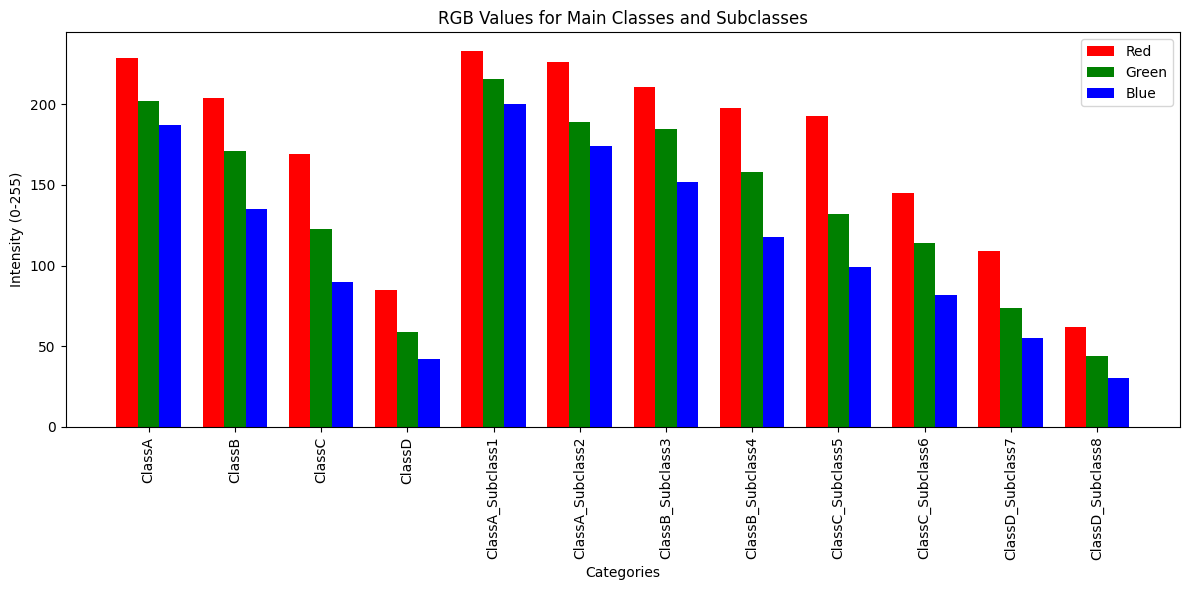

In [4]:
# Define data for the main classes and subclasses
categories = list(main_class_averages.keys()) + list(new_scale.keys())
rgb_values = list(main_class_averages.values()) + list(new_scale.values())

# Separate RGB channels for plotting
red_values = [rgb[0] for rgb in rgb_values]
green_values = [rgb[1] for rgb in rgb_values]
blue_values = [rgb[2] for rgb in rgb_values]

# Set up the figure and bar width
x = np.arange(len(categories))
width = 0.25

# Create a grouped bar chart for RGB values
plt.figure(figsize=(12, 6))
plt.bar(x - width, red_values, width, color='red', label='Red')
plt.bar(x, green_values, width, color='green', label='Green')
plt.bar(x + width, blue_values, width, color='blue', label='Blue')

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Intensity (0-255)")
plt.title("RGB Values for Main Classes and Subclasses")
plt.xticks(x, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

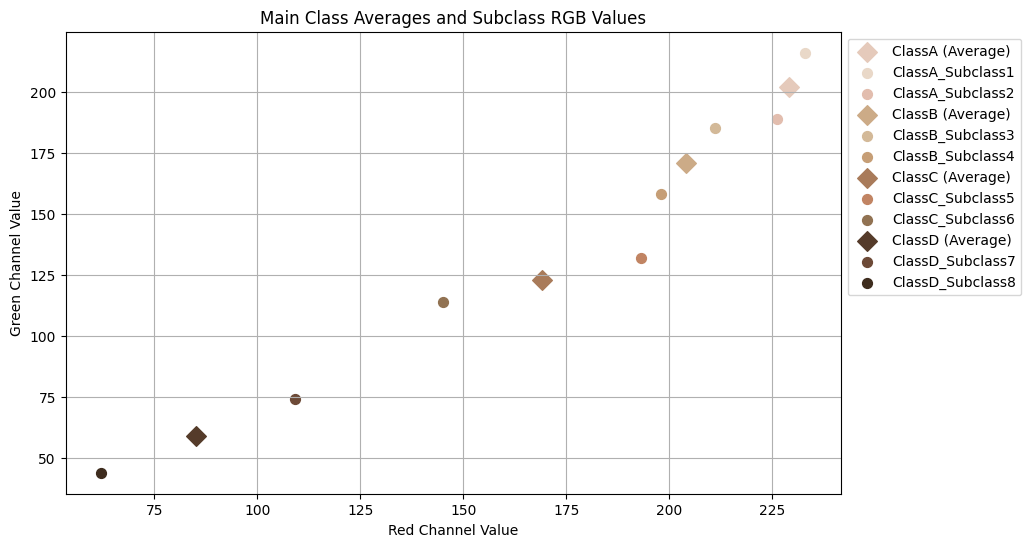

In [5]:
# Plot main classes and their subclasses
plt.figure(figsize=(10, 6))
for main_class, avg_color in main_class_averages.items():
    # Plot main class average
    plt.scatter(*avg_color[:2], color=[c/255 for c in avg_color], label=f"{main_class} (Average)", s=100, marker="D")

    # Plot subclasses within each main class
    for subclass, rgb_color in new_scale.items():
        if subclass.startswith(main_class):
            plt.scatter(*rgb_color[:2], color=[c/255 for c in rgb_color], label=subclass, s=50, marker="o")

# Customizing the plot
plt.xlabel("Red Channel Value")
plt.ylabel("Green Channel Value")
plt.title("Main Class Averages and Subclass RGB Values")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

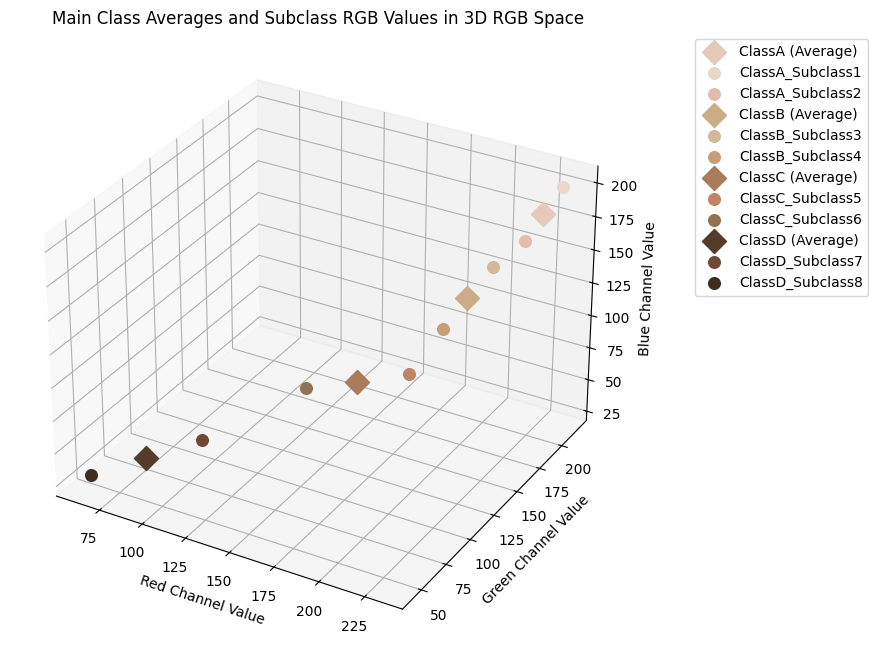

In [6]:
# Plot the colors in a 3D space to show RGB relationships
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each main class and its subclasses in RGB space
for main_class, avg_color in main_class_averages.items():
    # Plot main class average as a larger diamond marker
    ax.scatter(*avg_color, color=[c / 255 for c in avg_color], label=f"{main_class} (Average)", s=150, marker="D")

    # Plot subclasses within each main class as smaller circular markers
    for subclass, rgb_color in new_scale.items():
        if subclass.startswith(main_class):
            ax.scatter(*rgb_color, color=[c / 255 for c in rgb_color], label=subclass, s=70, marker="o")

# Set axis labels and title
ax.set_xlabel("Red Channel Value")
ax.set_ylabel("Green Channel Value")
ax.set_zlabel("Blue Channel Value")
ax.set_title("Main Class Averages and Subclass RGB Values in 3D RGB Space")
ax.legend(loc="upper left", bbox_to_anchor=(1.1, 1))
plt.show()

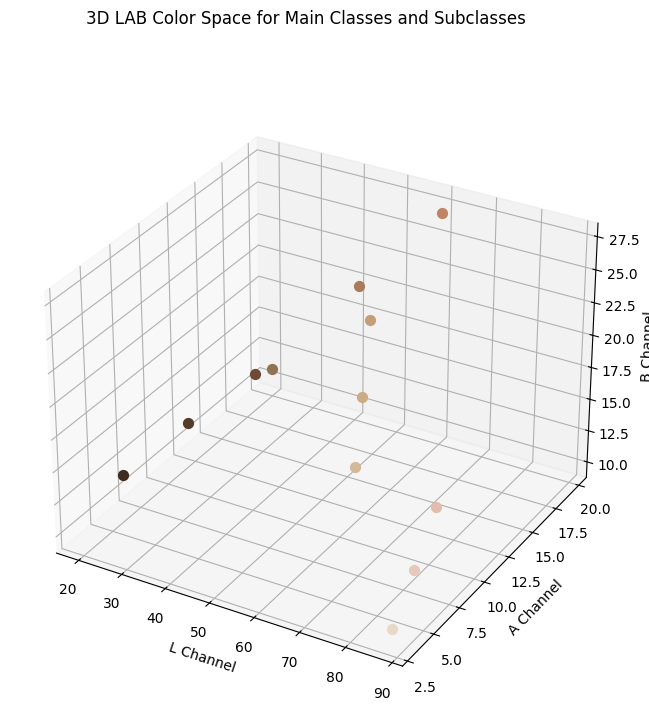

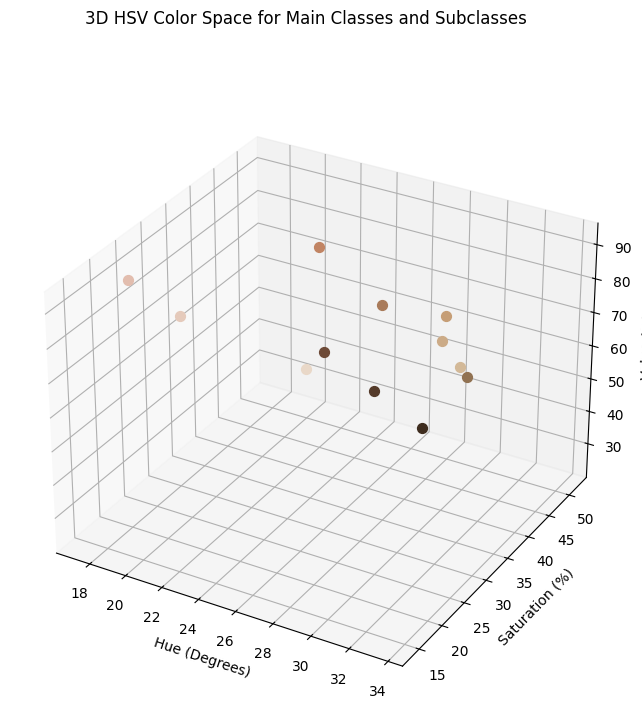

In [7]:
# Convert RGB values to LAB and HSV color spaces for main classes and subclasses
data_lab = {
    'Class': [],
    'Subclass': [],
    'L': [],
    'A': [],
    'B': []
}

data_hsv = {
    'Class': [],
    'Subclass': [],
    'H': [],
    'S': [],
    'V': []
}

# Populate data dictionaries with LAB and HSV values
for main_class, avg_color in main_class_averages.items():
    # Convert main class average to LAB and HSV
    avg_color_lab = color.rgb2lab(np.array([[avg_color]], dtype=np.uint8) / 255.0)[0][0]
    avg_color_hsv = color.rgb2hsv(np.array([[avg_color]], dtype=np.uint8) / 255.0)[0][0]

    # Add main class average to both LAB and HSV data
    data_lab['Class'].append(main_class)
    data_lab['Subclass'].append('Average')
    data_lab['L'].append(avg_color_lab[0])
    data_lab['A'].append(avg_color_lab[1])
    data_lab['B'].append(avg_color_lab[2])

    data_hsv['Class'].append(main_class)
    data_hsv['Subclass'].append('Average')
    data_hsv['H'].append(avg_color_hsv[0] * 360)  # Hue range in degrees
    data_hsv['S'].append(avg_color_hsv[1] * 100)  # Saturation as percentage
    data_hsv['V'].append(avg_color_hsv[2] * 100)  # Value as percentage

    # Add subclasses for each main class
    for subclass, rgb_color in new_scale.items():
        if subclass.startswith(main_class):
            # Convert subclass RGB to LAB and HSV
            subclass_lab = color.rgb2lab(np.array([[rgb_color]], dtype=np.uint8) / 255.0)[0][0]
            subclass_hsv = color.rgb2hsv(np.array([[rgb_color]], dtype=np.uint8) / 255.0)[0][0]

            # Add to LAB data
            data_lab['Class'].append(main_class)
            data_lab['Subclass'].append(subclass)
            data_lab['L'].append(subclass_lab[0])
            data_lab['A'].append(subclass_lab[1])
            data_lab['B'].append(subclass_lab[2])

            # Add to HSV data
            data_hsv['Class'].append(main_class)
            data_hsv['Subclass'].append(subclass)
            data_hsv['H'].append(subclass_hsv[0] * 360)
            data_hsv['S'].append(subclass_hsv[1] * 100)
            data_hsv['V'].append(subclass_hsv[2] * 100)

# Convert to DataFrames
df_lab = pd.DataFrame(data_lab)
df_hsv = pd.DataFrame(data_hsv)

# Plotting LAB color space in 3D
fig_lab = plt.figure(figsize=(10, 8))
ax_lab = fig_lab.add_subplot(111, projection='3d')
fig_lab.suptitle("3D LAB Color Space for Main Classes and Subclasses")

# Plot each main class and its subclasses in LAB space with color based on RGB
for i in range(len(df_lab)):
    color_rgb = new_scale.get(df_lab['Subclass'][i], main_class_averages[df_lab['Class'][i]])
    color_rgb_normalized = [c / 255 for c in color_rgb]
    ax_lab.scatter(df_lab['L'][i], df_lab['A'][i], df_lab['B'][i], color=color_rgb_normalized, s=50)

ax_lab.set_xlabel("L Channel")
ax_lab.set_ylabel("A Channel")
ax_lab.set_zlabel("B Channel")

# Plotting HSV color space in 3D
fig_hsv = plt.figure(figsize=(10, 8))
ax_hsv = fig_hsv.add_subplot(111, projection='3d')
fig_hsv.suptitle("3D HSV Color Space for Main Classes and Subclasses")

# Plot each main class and its subclasses in HSV space with color based on RGB
for i in range(len(df_hsv)):
    color_rgb = new_scale.get(df_hsv['Subclass'][i], main_class_averages[df_hsv['Class'][i]])
    color_rgb_normalized = [c / 255 for c in color_rgb]
    ax_hsv.scatter(df_hsv['H'][i], df_hsv['S'][i], df_hsv['V'][i], color=color_rgb_normalized, s=50)

ax_hsv.set_xlabel("Hue (Degrees)")
ax_hsv.set_ylabel("Saturation (%)")
ax_hsv.set_zlabel("Value (%)")

plt.show()

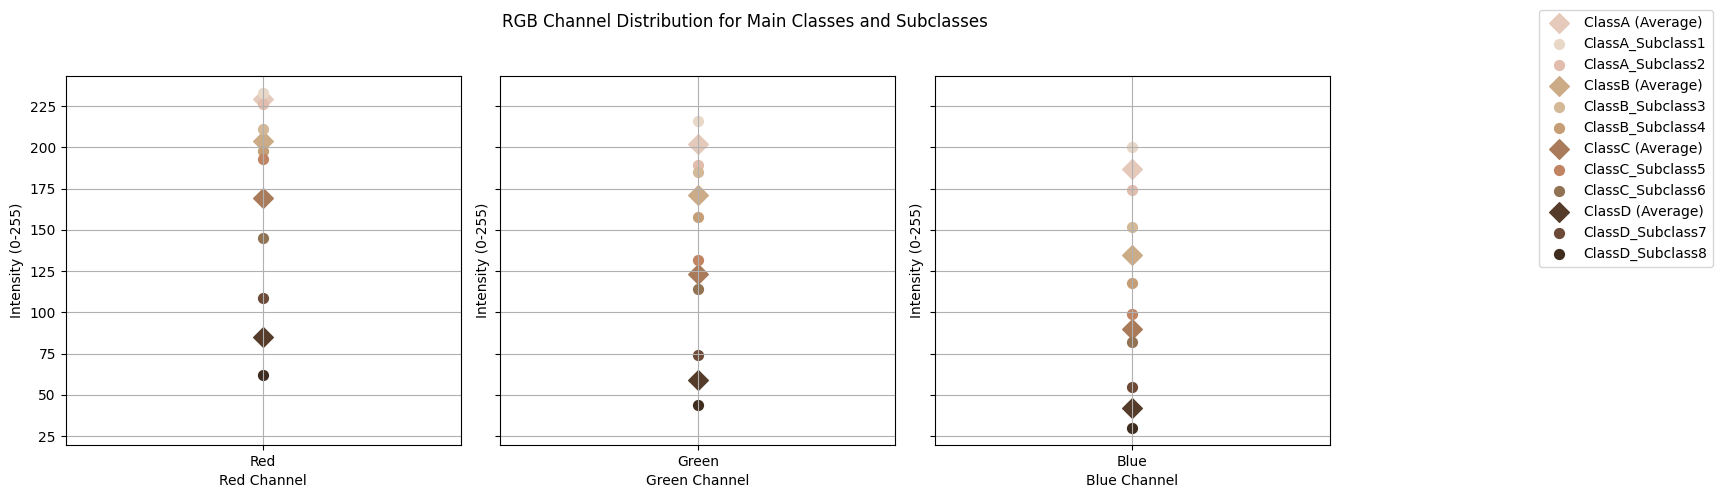

In [8]:
# Alternative plot for main classes and their subclasses, focusing on RGB distribution across channels
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle("RGB Channel Distribution for Main Classes and Subclasses")

# Colors for each channel for visual clarity
channel_names = ['Red', 'Green', 'Blue']
channel_indices = [0, 1, 2]

# Plot each channel separately for main classes and their subclasses
for i, channel in enumerate(channel_indices):
    for main_class, avg_color in main_class_averages.items():
        # Plot main class average as a larger diamond
        ax[i].scatter(channel, avg_color[channel], color=[c / 255 for c in avg_color],
                      label=f"{main_class} (Average)", s=100, marker="D")

        # Plot subclasses for each main class
        for subclass, rgb_color in new_scale.items():
            if subclass.startswith(main_class):
                ax[i].scatter(channel, rgb_color[channel], color=[c / 255 for c in rgb_color],
                              label=subclass, s=50, marker="o")

    # Set axis labels and title for each channel subplot
    ax[i].set_xlabel(f"{channel_names[i]} Channel")
    ax[i].set_xticks([channel])
    ax[i].set_xticklabels([channel_names[i]])
    ax[i].set_ylabel("Intensity (0-255)")
    ax[i].grid(True)

# Create a single legend for the entire figure
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.15, 1))
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

In [ ]:
def rgb_to_hsv(rgb_color):
    rgb_color = np.array([[rgb_color]], dtype=np.uint8)
    hsv_color = cv2.cvtColor(rgb_color, cv2.COLOR_RGB2HSV)
    return hsv_color[0][0]

def hsv_to_lab(hsv_color):
    hsv_color = np.array([[hsv_color]], dtype=np.uint8)
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    lab_color = color.rgb2lab(rgb_color / 255.0)
    return lab_color[0][0]

def hsv_to_rgb(hsv_color):
    # Convert to an array and reshape for cv2 compatibility
    hsv_color = np.array(hsv_color, dtype=np.uint8).reshape(1, 1, 3)
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    return rgb_color[0][0]

In [ ]:
# Function to find the dominant color using X-means clustering in HSV
def find_dominant_color_xmeans_hsv(hsv_values, initial_clusters=3):
  """
    Find the dominant color in HSV color space using X-means clustering.

    This function uses X-means clustering to determine the optimal number of clusters
    and find the most dominant color in the HSV dataset.

    Parameters:
    - hsv_values (numpy.ndarray): Array of HSV pixel values, where each row represents a pixel's HSV triplet.
    - initial_clusters (int): Initial number of clusters for the KMeans++ initializer.

    Returns:
    - numpy.ndarray: The HSV triplet of the dominant color as an integer array.
    """

    initial_centers = kmeans_plusplus_initializer(hsv_values, initial_clusters).initialize()

    metric = distance_metric(type_metric.EUCLIDEAN)
    xmeans_instance = xmeans(hsv_values, initial_centers, ccore=True, metric=metric)
    xmeans_instance.process()

    clusters = xmeans_instance.get_clusters()
    centers = xmeans_instance.get_centers()

    largest_cluster_index = np.argmax([len(cluster) for cluster in clusters])
    dominant_color = np.array(centers[largest_cluster_index])

    return dominant_color.astype(int)

In [ ]:
def find_main_class_and_subclass(dominant_hsv, main_class_averages, scale_colors):
  """
    Determine the closest main class and subclass based on the dominant HSV color.

    This function uses Delta E (CIE 2000) to calculate the perceptual color difference in LAB space.
    It first identifies the main class by comparing the dominant color in RGB to main class averages,
    then selects the closest subclass within that main class using HSV for finer granularity.

    Parameters:
    - dominant_hsv (numpy.ndarray): The dominant HSV color of the image.
    - main_class_averages (dict): Dictionary of main classes with their average RGB color values.
    - scale_colors (dict): Dictionary of subclasses with their RGB color values, formatted as 'main_class_subclass'.

    Returns:
    - tuple: Closest main class and subclass names.
    """
    # Convert the HSV dominant color to LAB for subclass comparison only
    dominant_lab = hsv_to_lab(dominant_hsv)
    print("Dominant LAB for subclass comparison:", dominant_lab)

    # Step 1: Find the closest main class by comparing dominant color in RGB to main class averages in RGB
    min_delta_e_main = float('inf')
    closest_main_class = None

    # Convert dominant color from HSV to RGB for main class comparison
    dominant_rgb = hsv_to_rgb(dominant_hsv)
    dominant_lab_main = color.rgb2lab(np.array(dominant_rgb).reshape(1, 1, 3) / 255.0)[0, 0]

    for main_class, rgb_value in main_class_averages.items():
        main_class_lab = color.rgb2lab(np.array(rgb_value).reshape(1, 1, 3) / 255.0)[0, 0]

        # Calculate Delta E for main class in LAB space
        delta_e_main = color.deltaE_ciede2000(dominant_lab_main.reshape(1, 3), main_class_lab.reshape(1, 3)).item()
        print(f"Delta E for main class {main_class}: {delta_e_main}")

        # Update closest main class if this Delta E is smaller
        if delta_e_main < min_delta_e_main:
            min_delta_e_main = delta_e_main
            closest_main_class = main_class

    # Step 2: Find the closest subclass within the determined main class using HSV for finer comparison
    min_delta_e_subclass = float('inf')
    closest_subclass = None

    for full_class_name, rgb_value in scale_colors.items():
        main_class, subclass = full_class_name.split('_')
        if main_class != closest_main_class:
            continue  # Skip subclasses outside of the selected main class

        # Convert subclass RGB to HSV and then to LAB for Delta E comparison
        subclass_hsv = rgb_to_hsv(rgb_value)
        subclass_lab = hsv_to_lab(subclass_hsv)

        delta_e_subclass = color.deltaE_ciede2000(dominant_lab.reshape(1, 3), subclass_lab.reshape(1, 3)).item()
        print(f"Delta E for subclass {full_class_name}: {delta_e_subclass}")

        # Update closest subclass if this Delta E is smaller
        if delta_e_subclass < min_delta_e_subclass:
            min_delta_e_subclass = delta_e_subclass
            closest_subclass = subclass

    print(f"Selected main class: {closest_main_class}, Selected subclass: {closest_subclass}")
    return closest_main_class, closest_subclass

In [ ]:
def apply_adaptive_color_correction(image_rgb):
  """
    Apply adaptive color correction to enhance the red channel proportionally based on average intensities.

    This function adjusts the red channel intensity by calculating a proportional boost
    based on the difference between the green and red channel averages relative to the green channel.

    Parameters:
    - image_rgb (numpy.ndarray): Input RGB image in uint8 format.

    Returns:
    - numpy.ndarray: Color-corrected RGB image in uint8 format.
    """

    # Ensure input image is in float format for safe manipulation
    image_rgb = image_rgb.astype(np.float32)

    # Calculate the average intensity of each channel
    avg_blue = np.mean(image_rgb[:, :, 2])  # Blue is at index 2 in RGB
    avg_green = np.mean(image_rgb[:, :, 1])  # Green is at index 1 in RGB
    avg_red = np.mean(image_rgb[:, :, 0])    # Red is at index 0 in RGB

    # Apply a proportional boost to the red channel based on its initial intensity
    if avg_green != 0:  # Avoid division by zero
        red_boost = 1.0 + (0.2 * (avg_green - avg_red) / avg_green)
    else:
        red_boost = 1.0  # No boost if green is zero

    # Apply the boost only to the red channel
    image_rgb[:, :, 0] *= red_boost  # Adjust red channel only

    # Clip values to ensure they remain within the valid range
    image_rgb = np.clip(image_rgb, 0, 255).astype(np.uint8)

    return image_rgb

In [ ]:
def calculate_metrics(true_labels, predicted_labels):
    print("Ground truth labels:", true_labels)
    print("Predicted labels:", predicted_labels)

    # Define the full range of labels
    all_labels = sorted(set(true_labels + predicted_labels))

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, labels=all_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, labels=all_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, labels=all_labels, average='weighted', zero_division=1)

    # Generate confusion matrix with specified labels
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=all_labels)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

In [ ]:
def extract_numeric_class(label):
    """Extract the numeric part of a class label (e.g., Class3 -> 3, Subclass2 -> 2)."""
    match = re.search(r'\d+', label)  # Look for numbers in the label
    return match.group() if match else None  # Return the number if found

In [ ]:
def visualize_and_evaluate_images_with_blur_delta_e_hsv(parsed_dataset_path, batch_size, blur_amount=0.08, gamma_value=1.0):
  """
    Visualize and evaluate parsed images with Gaussian blur and gamma correction, using Delta E (CIE 2000) for skin tone classification.

    Parameters:
    - parsed_dataset_path (str): Path to the parsed dataset directory.
    - batch_size (int): Maximum number of images to process in one batch.
    - blur_amount (float): Blur intensity for Gaussian blur (proportional to image width).
    - gamma_value (float): Gamma correction factor for brightness adjustment.

    Steps:
    1. Iterate through parsed images in the dataset.
    2. Apply Gaussian blur and gamma correction to enhance image quality.
    3. Extract skin pixel regions and convert to HSV.
    4. Find the dominant HSV color using X-means clustering.
    5. Determine the closest main class and subclass using Delta E.
    6. Collect ground truth and predicted labels for evaluation.
    """
    processed_count = 0
    ground_truth_labels = []
    predicted_labels = []

    for class_folder in os.listdir(parsed_dataset_path):
        class_folder_path = os.path.join(parsed_dataset_path, class_folder)
        if not os.path.isdir(class_folder_path):
            continue

        for image_name in os.listdir(class_folder_path):
            if processed_count >= batch_size:
                break

            image_path = os.path.join(class_folder_path, image_name)
            if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            print(f"Loading parsed image: {image_name}")
            parsed_image = cv2.imread(image_path)
            if parsed_image is None:
                print(f"Error loading parsed image: {image_name}")
                continue

            parsed_image_rgb = cv2.cvtColor(parsed_image, cv2.COLOR_BGR2RGB)

            # Apply Gaussian blur
            blurred_image = blur_image(parsed_image_rgb, blur_amount=blur_amount)
            gamma_corrected_image = apply_gamma_correction(blurred_image, gamma=gamma_value)

            binary_mask = (parsed_image_rgb > 0).any(axis=2).astype(np.uint8)
            if binary_mask.any():
                indices = np.argwhere(binary_mask)
                rgb_skin_pixels = gamma_corrected_image[indices[:, 0], indices[:, 1], :]
                hsv_codes = cv2.cvtColor(np.array([rgb_skin_pixels]), cv2.COLOR_RGB2HSV)[0]

                # Find dominant HSV color
                dominant_hsv = find_dominant_color_xmeans_hsv(hsv_codes)
                main_class, subclass = find_main_class_and_subclass(dominant_hsv, main_class_averages, new_scale)

                # Extract numeric labels only for ground truth and predicted labels
                predicted_class = int(subclass[-1])  # Extract the last number from "SubclassX"
                #ground_truth = int(image_name.split('_')[-1].replace("Class", "").replace(".jpg", ""))
                ground_truth = int(image_name.split('_')[-1].replace("Class", "").replace(".jpg", "").replace(".png", ""))

                ground_truth_labels.append(ground_truth)
                predicted_labels.append(predicted_class)
            else:
                print(f"No skin detected in parsed image {image_name}, skipping.")

            processed_count += 1

    # Print labels for debugging
    print("Ground truth labels:", ground_truth_labels)
    print("Predicted labels:", predicted_labels)

    # Evaluate the predictions
    if ground_truth_labels and predicted_labels:
        calculate_metrics(ground_truth_labels, predicted_labels)
    else:
        print("No valid images processed for evaluation.")

In [ ]:
visualize_and_evaluate_images_with_blur_delta_e_hsv('/content/drive/MyDrive/OLDNEW_DATA', batch_size=720)

Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [167   5 239], Predicted Subclass: ClassA_Subclass1
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [  2  25 206], Predicted Subclass: ClassA_Subclass2
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [  5  26 230], Predicted Subclass: ClassA_Subclass1
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [  5  26 218], Predicted Subclass: ClassA_Subclass2
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 15  33 219], Predicted Subclass: ClassA_Subclass1
Predicted Main Class: ClassB, Relevant Subclasses: ['ClassB_Subclass3', 'ClassB_Subclass4']
Dominant Color: [  5  14 233], Predicted Subclass: ClassA_Subclass1
Predicted Main Class: ClassA, Relevant S

In [ ]:
visualize_and_evaluate_images_with_blur_delta_e_hsv('/content/drive/MyDrive/Parsed_Image', batch_size=400)

Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 19  75 230], Predicted Subclass: ClassB_Subclass3
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 18  65 203], Predicted Subclass: ClassB_Subclass3
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 15  47 184], Predicted Subclass: ClassB_Subclass3
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 17  79 212], Predicted Subclass: ClassB_Subclass3
Predicted Main Class: ClassA, Relevant Subclasses: ['ClassA_Subclass1', 'ClassA_Subclass2']
Dominant Color: [ 18  55 206], Predicted Subclass: ClassB_Subclass3
Predicted Main Class: ClassB, Relevant Subclasses: ['ClassB_Subclass3', 'ClassB_Subclass4']
Dominant Color: [ 20  44 214], Predicted Subclass: ClassA_Subclass1
Predicted Main Class: ClassA, Relevant S

# SVM with ResNet-18 as Feature Extractor

In [ ]:
# Define augmentation parameters
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Paths for input and output directories
input_dir = '/content/drive/MyDrive/OLDNEW_DATA'  # Upload your original dataset to Colab in this path
output_dir = '/content/augmented images'      # Path to save augmented images

# Clear any existing augmented data directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir, exist_ok=True)

# Number of augmented images to generate per original image
num_augmented_images = 5

# Loop over each class directory in the input directory
for class_name in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory files

    # Create a corresponding directory in the output directory
    augmented_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(augmented_class_dir, exist_ok=True)

    # Loop over each image in the class directory
    for image_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, image_name)
        img = load_img(img_path)  # Load the image
        img_array = img_to_array(img)  # Convert to numpy array
        img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension

        # Generate augmented images and save them to the output directory
        count = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_class_dir, save_prefix='aug', save_format='jpg'):
            count += 1
            if count >= num_augmented_images:
                break  # Stop after generating the specified number of augmented images

    # Count and print the number of images in the augmented class directory
    num_images = len(os.listdir(augmented_class_dir))
    print(f"Class '{class_name}' has {num_images} images after augmentation.")

# Zip the augmented directory
shutil.make_archive('/content/augmented_images', 'zip', output_dir)

# Download the zip file
from google.colab import files
files.download('/content/augmented_images.zip')


Class 'Class1' has 440 images after augmentation.
Class 'Class2' has 438 images after augmentation.
Class 'Class3' has 432 images after augmentation.
Class 'Class4' has 443 images after augmentation.
Class 'Class5' has 438 images after augmentation.
Class 'Class6' has 441 images after augmentation.
Class 'Class7' has 433 images after augmentation.
Class 'Class8' has 438 images after augmentation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Paths
input_zip = '/content/augmented_images (3).zip'  # Path to the input zip file
extracted_dir = '/content/extracted_images1'  # Temporary directory to extract images
balanced_dir = '/content/balanced_images1'  # Directory to save balanced dataset
balanced_zip = '/content/balanced_dataset1.zip'  # Output zip file for the balanced dataset

# Clear and recreate directories
if os.path.exists(extracted_dir):
    shutil.rmtree(extracted_dir)
if os.path.exists(balanced_dir):
    shutil.rmtree(balanced_dir)
os.makedirs(balanced_dir, exist_ok=True)

# Extract the zip file
os.makedirs(extracted_dir, exist_ok=True)
with ZipFile(input_zip, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Calculate target count (maximum class size)
class_counts = [len(os.listdir(os.path.join(extracted_dir, class_name)))
                for class_name in os.listdir(extracted_dir) if os.path.isdir(os.path.join(extracted_dir, class_name))]
target_count = max(class_counts)
print(f"Target number of images per class: {target_count}")

# Balance each class
for class_name in os.listdir(extracted_dir):
    class_dir = os.path.join(extracted_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Create corresponding directory in the balanced dataset
    balanced_class_dir = os.path.join(balanced_dir, class_name)
    os.makedirs(balanced_class_dir, exist_ok=True)

    # Copy all original images
    original_images = os.listdir(class_dir)
    for image_name in original_images:
        shutil.copy(os.path.join(class_dir, image_name), balanced_class_dir)

    # Augment or duplicate images to reach the target count
    current_count = len(original_images)
    additional_images_needed = target_count - current_count

    if additional_images_needed > 0:
        while additional_images_needed > 0:
            # Randomly select an image for augmentation/duplication
            selected_image = random.choice(original_images)
            img_path = os.path.join(class_dir, selected_image)
            img = load_img(img_path)  # Load the image
            img_array = img_to_array(img)  # Convert to numpy array
            img_array = img_array.reshape((1,) + img_array.shape)

            # Augment and save the image
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=balanced_class_dir, save_prefix='aug', save_format='jpg'):
                additional_images_needed -= 1
                if additional_images_needed <= 0:
                    break

    # Print class information
    final_count = len(os.listdir(balanced_class_dir))
    print(f"Class '{class_name}' now has {final_count} images.")

# Zip the balanced dataset
shutil.make_archive(balanced_dir, 'zip', balanced_dir)

# Download the balanced dataset zip file
from google.colab import files
files.download(balanced_dir + '.zip')


In [ ]:
# Paths
input_zip = '/content/augmented_images (3).zip'  # Path to the input zip file
extracted_dir = '/content/extracted_images1'  # Temporary directory to extract images
balanced_dir = '/content/balanced_images1'  # Directory to save balanced dataset
balanced_zip = '/content/balanced_dataset1.zip'  # Output zip file for the balanced dataset

# Clear and recreate directories
if os.path.exists(extracted_dir):
    shutil.rmtree(extracted_dir)
if os.path.exists(balanced_dir):
    shutil.rmtree(balanced_dir)
os.makedirs(balanced_dir, exist_ok=True)

# Extract the zip file
os.makedirs(extracted_dir, exist_ok=True)
with ZipFile(input_zip, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Calculate target count (maximum class size)
class_counts = [len(os.listdir(os.path.join(extracted_dir, class_name)))
                for class_name in os.listdir(extracted_dir) if os.path.isdir(os.path.join(extracted_dir, class_name))]
target_count = max(class_counts)
print(f"Target number of images per class: {target_count}")

# Balance each class
for class_name in os.listdir(extracted_dir):
    class_dir = os.path.join(extracted_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Create corresponding directory in the balanced dataset
    balanced_class_dir = os.path.join(balanced_dir, class_name)
    os.makedirs(balanced_class_dir, exist_ok=True)

    # Copy all original images
    original_images = os.listdir(class_dir)
    for image_name in original_images:
        shutil.copy(os.path.join(class_dir, image_name), balanced_class_dir)

    # Augment or duplicate images to reach the target count
    current_count = len(original_images)
    additional_images_needed = target_count - current_count

    if additional_images_needed > 0:
        while additional_images_needed > 0:
            # Randomly select an image for augmentation/duplication
            selected_image = random.choice(original_images)
            img_path = os.path.join(class_dir, selected_image)
            img = load_img(img_path)  # Load the image
            img_array = img_to_array(img)  # Convert to numpy array
            img_array = img_array.reshape((1,) + img_array.shape)

            # Augment and save the image
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=balanced_class_dir, save_prefix='aug', save_format='jpg'):
                additional_images_needed -= 1
                if additional_images_needed <= 0:
                    break

    # Print class information
    final_count = len(os.listdir(balanced_class_dir))
    print(f"Class '{class_name}' now has {final_count} images.")

# Zip the balanced dataset
shutil.make_archive(balanced_dir, 'zip', balanced_dir)

# Download the balanced dataset zip file
from google.colab import files
files.download(balanced_dir + '.zip')


Target number of images per class: 443
Class 'Class3' now has 443 images.
Class 'Class7' now has 443 images.
Class 'Class6' now has 443 images.
Class 'Class1' now has 443 images.
Class 'Class4' now has 443 images.
Class 'Class2' now has 442 images.
Class 'Class8' now has 442 images.
Class 'Class5' now has 443 images.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Path to the input zip file
input_zip = '/content/balanced_images1 (1).zip'

# Directory to extract the zip contents
output_dir = '/content/balanced_data'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Extract the zip file
print(f"Extracting '{input_zip}' to '{output_dir}'...")
with ZipFile(input_zip, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Extraction complete! Files are available in '{output_dir}'.")


Extracting '/content/balanced_images1 (1).zip' to '/content/balanced_data'...
Extraction complete! Files are available in '/content/balanced_data'.


In [ ]:

# Define the ResNet-18 architecture
def residual_block(x, filters, stride=1):
    shortcut = x

    # First convolution
    x = Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second convolution
    x = Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet18(input_shape=(224, 224, 3)):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # Global Average Pooling for feature extraction
    x = GlobalAveragePooling2D()(x)

    return Model(inputs, x)

# Load ResNet-18 for feature extraction
base_model = build_resnet18(input_shape=(224, 224, 3))

data_dir = '/content/balanced_data'

# Preprocess the data
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a data generator
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No labels needed, we only want features
    shuffle=False
)

# Extract features
print("Extracting features using ResNet-18...")
features = base_model.predict(data_generator, steps=len(data_generator), verbose=1)

# Save the features
output_file = '/content/extracted_features.npy'
np.save(output_file, features)

print(f"Features extracted and saved to {output_file}")


Found 3542 images belonging to 8 classes.
Extracting features using ResNet-18...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step
Features extracted and saved to /content/extracted_features.npy


In [ ]:
# Load ResNet-18 for feature extraction
base_model = build_resnet18(input_shape=(224, 224, 3))

data_dir = '/content/balanced_data'

# Preprocess the Data
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a data generator
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Labels are needed for training later
    shuffle=False
)

# Extract Features Using ResNet-18
print("Extracting features using ResNet-18...")
features = base_model.predict(data_generator, steps=len(data_generator), verbose=1)

# Flatten the features to make it 2D (samples, features)
num_samples = features.shape[0]
features_flat = features.reshape(num_samples, -1)  # Flatten the output

# Get the class labels from the data generator
labels = data_generator.classes

# Save the features and labels
np.save('/content/extracted_features.npy', features_flat)
np.save('/content/labels.npy', labels)

# Load features and labels
features = np.load('/content/extracted_features.npy')
labels = np.load('/content/labels.npy')

# Stratified Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm = SVC(probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=3, verbose=2, scoring='accuracy')

# Train the SVM model
print("Training the SVM model...")
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on training, validation, and test sets
best_svm = grid_search.best_estimator_

# Predictions
train_predictions = best_svm.predict(X_train)
val_predictions = best_svm.predict(X_val)
test_predictions = best_svm.predict(X_test)


Found 3542 images belonging to 8 classes.
Extracting features using ResNet-18...
111/111 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step
Training the SVM model...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   6.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   5.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   6.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf

In [ ]:
# Print classification report for Training Set
print("\nTraining Set Classification Report:")
print(classification_report(y_train, train_predictions))

# Print classification report for Validation Set
print("\nValidation Set Classification Report:")
print(classification_report(y_val, val_predictions))

# Print classification report for Test Set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predictions))



Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       310
           1       0.88      0.84      0.86       309
           2       0.77      0.86      0.82       310
           3       0.75      0.65      0.70       310
           4       0.77      0.86      0.81       310
           5       0.67      0.65      0.66       310
           6       0.80      0.77      0.79       310
           7       0.93      0.94      0.94       310

    accuracy                           0.82      2479
   macro avg       0.82      0.82      0.82      2479
weighted avg       0.82      0.82      0.82      2479


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        67
           1       0.80      0.82      0.81        67
           2       0.75      0.82      0.78        66
           3       0.70      0.47      0.56        66
  

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# Unique class labels
classes = np.unique(y_train)


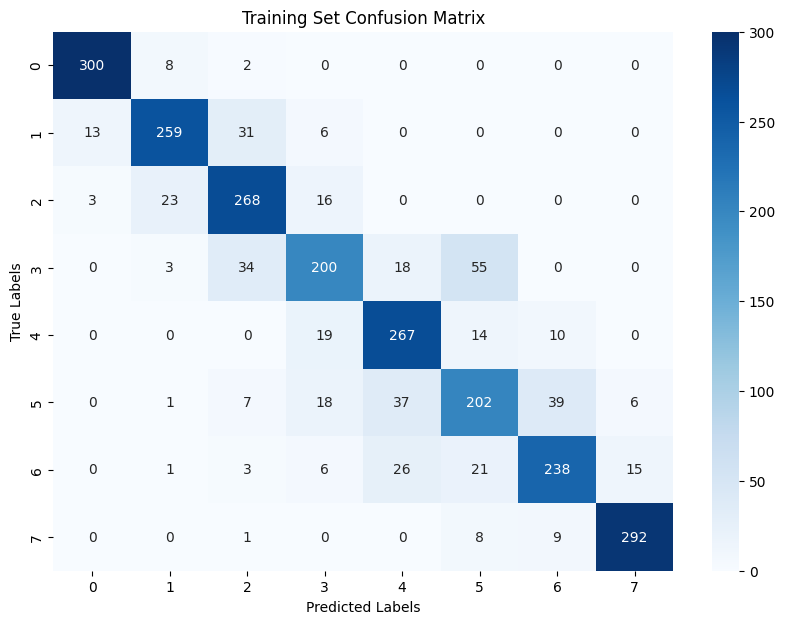

In [ ]:
# Confusion Matrix for Training Set
plot_confusion_matrix(y_train, train_predictions, classes, "Training Set Confusion Matrix")


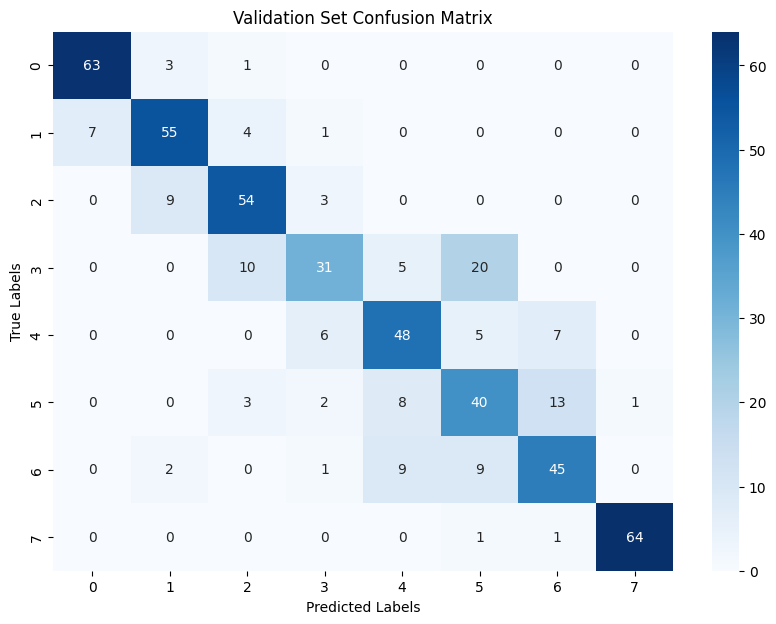

In [ ]:
# Confusion Matrix for Validation Set
plot_confusion_matrix(y_val, val_predictions, classes, "Validation Set Confusion Matrix")


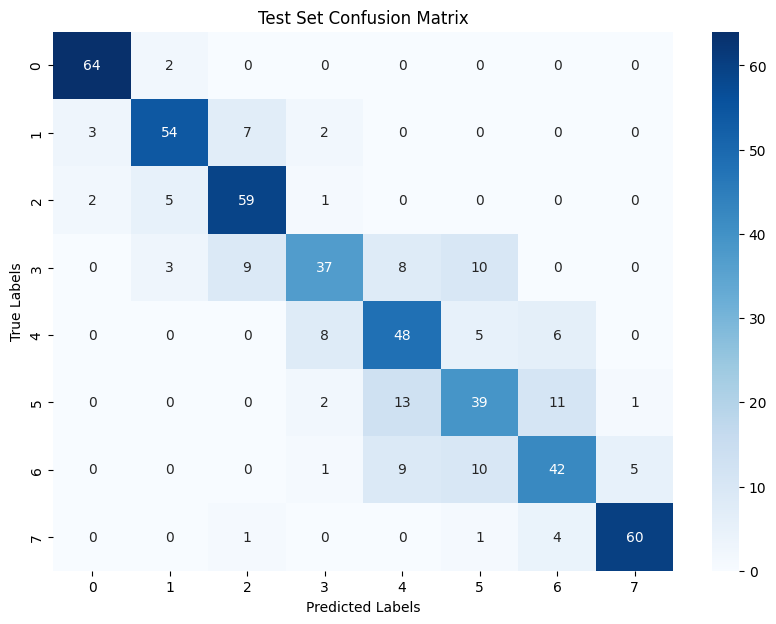

In [ ]:
# Confusion Matrix for Test Set
plot_confusion_matrix(y_test, test_predictions, classes, "Test Set Confusion Matrix")


In [ ]:
# Save the best SVM model
dump(best_svm, 'best_svm_model.joblib')
print("SVM model saved as 'best_svm_model.joblib'")


SVM model saved as 'best_svm_model.joblib'
